<a href="https://colab.research.google.com/github/tawadesharad/Seoul-Bike-Sharing-Demand-Prediction-Capstone-Project-2/blob/main/Bike_Sharing_Demand_Prediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Importing the dataset
#dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Regression Project/SeoulBikeData.csv', encoding= 'unicode_escape')

In [ ]:
# import from sharad
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Bike Sharing/SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/tawadesharad/Exploratory-Data-Analysis-Superstore-Dataset/main/SeoulBikeData.csv',encoding='unicode_escape')

In [ ]:
dataset.head()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]

### Data Inspection

In [ ]:
print('The shape of the dataset is: ',dataset.shape)

The shape of the dataset is:  (8760, 14)


In [ ]:
# First look
dataset.head(10)

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes
5  01/12/2017                100     5  ...   Winter  No Holiday              Yes
6  01/12/2017                181     6  ...   Winter  No Holiday              Yes
7  01/12/2017                460     7  ...   Winter  No Holiday              Yes
8  01/12/2017                930     8  ...   Winter  No Holiday              Yes
9  01/12/2017                490     9  ...   Winter  No Holiday              Yes

[10 rows x 14 columns]

In [ ]:
dataset.tail()

Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
8755  30/11/2018               1003    19  ...   Autumn  No Holiday              Yes
8756  30/11/2018                764    20  ...   Autumn  No Holiday              Yes
8757  30/11/2018                694    21  ...   Autumn  No Holiday              Yes
8758  30/11/2018                712    22  ...   Autumn  No Holiday              Yes
8759  30/11/2018                584    23  ...   Autumn  No Holiday              Yes

[5 rows x 14 columns]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
dataset.describe()

Rented Bike Count         Hour  ...  Rainfall(mm)  Snowfall (cm)
count        8760.000000  8760.000000  ...   8760.000000    8760.000000
mean          704.602055    11.500000  ...      0.148687       0.075068
std           644.997468     6.922582  ...      1.128193       0.436746
min             0.000000     0.000000  ...      0.000000       0.000000
25%           191.000000     5.750000  ...      0.000000       0.000000
50%           504.500000    11.500000  ...      0.000000       0.000000
75%          1065.250000    17.250000  ...      0.000000       0.000000
max          3556.000000    23.000000  ...     35.000000       8.800000

[8 rows x 10 columns]

In [ ]:
dataset.describe(include = 'all') 

Date  Rented Bike Count  ...     Holiday  Functioning Day
count         8760        8760.000000  ...        8760             8760
unique         365                NaN  ...           2                2
top     14/01/2018                NaN  ...  No Holiday              Yes
freq            24                NaN  ...        8328             8465
mean           NaN         704.602055  ...         NaN              NaN
std            NaN         644.997468  ...         NaN              NaN
min            NaN           0.000000  ...         NaN              NaN
25%            NaN         191.000000  ...         NaN              NaN
50%            NaN         504.500000  ...         NaN              NaN
75%            NaN        1065.250000  ...         NaN              NaN
max            NaN        3556.000000  ...         NaN              NaN

[11 rows x 14 columns]

In [ ]:
# Checking duplicate values
len(dataset[dataset.duplicated()])

0

In [ ]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
len(dataset.Date.unique())

365

In [ ]:
dataset.Seasons.value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
dataset['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
len(dataset[dataset['Rented Bike Count'] == 0])

295

In [ ]:
dataset['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

### Exploratory Data Analysis

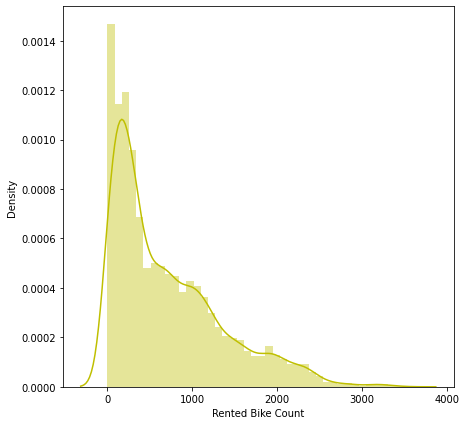

In [ ]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(dataset['Rented Bike Count'],color="y")

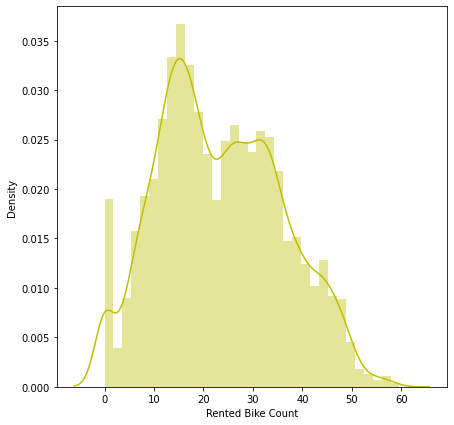

In [ ]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(dataset['Rented Bike Count']),color="y")

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

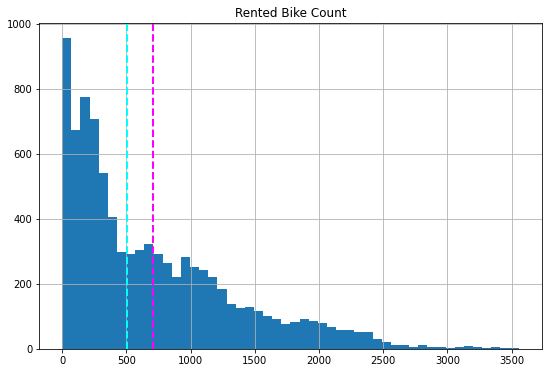

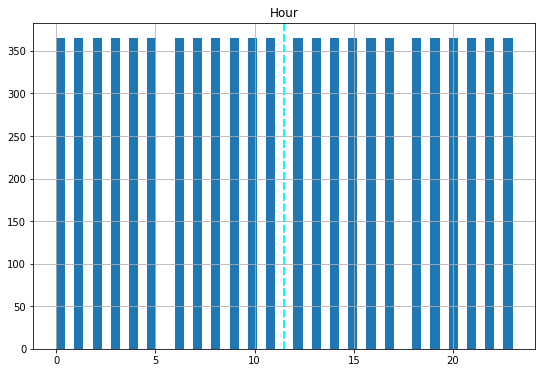

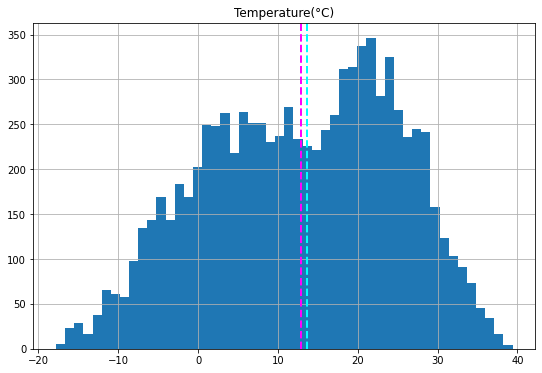

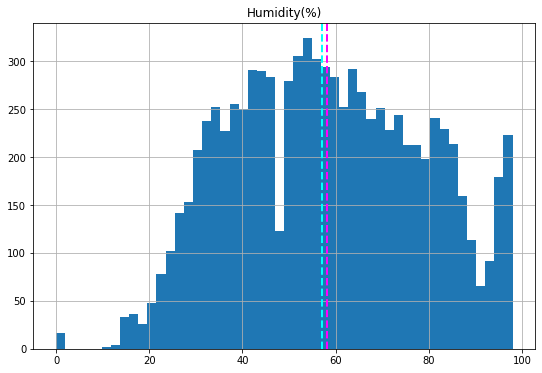

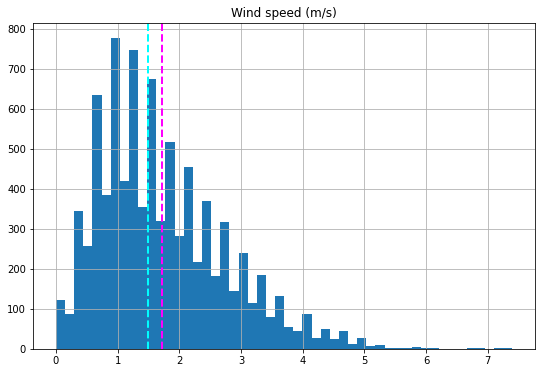

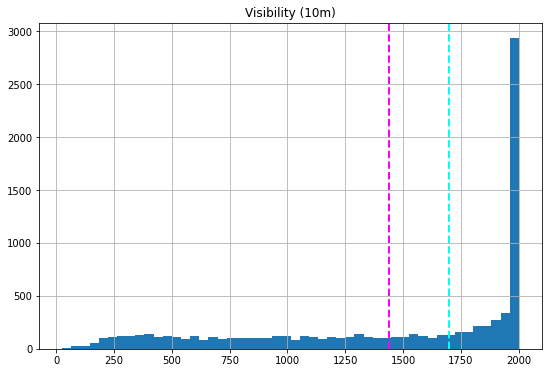

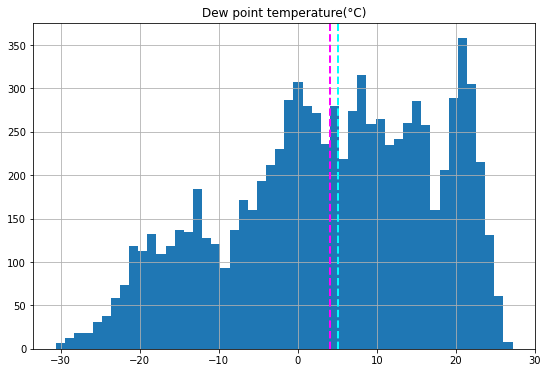

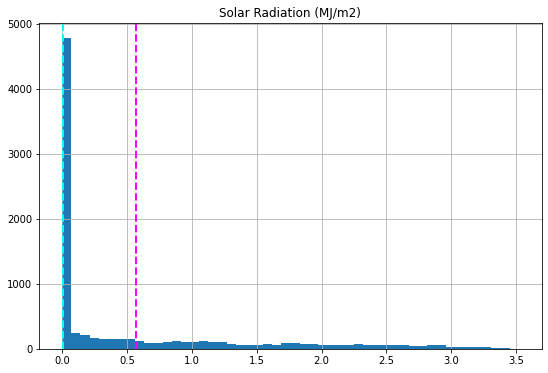

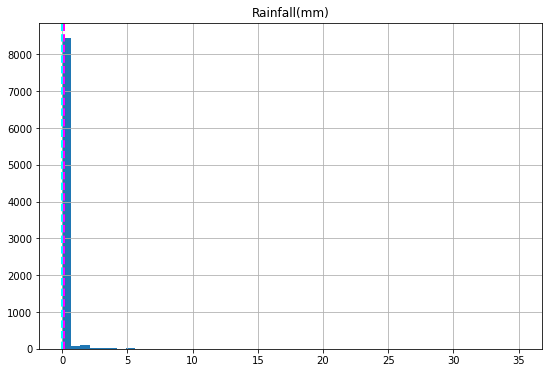

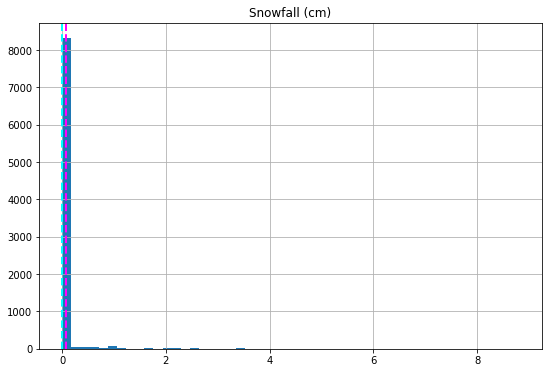

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()  #If the current axes doesn't exist, or isn't a polar one, the appropriate axes will be created and then returned.
    feature = dataset[col]
    feature.hist(bins=50, ax = ax) # 'ax stands for axis'
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

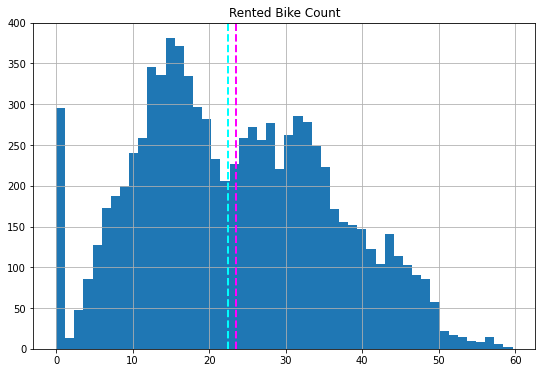

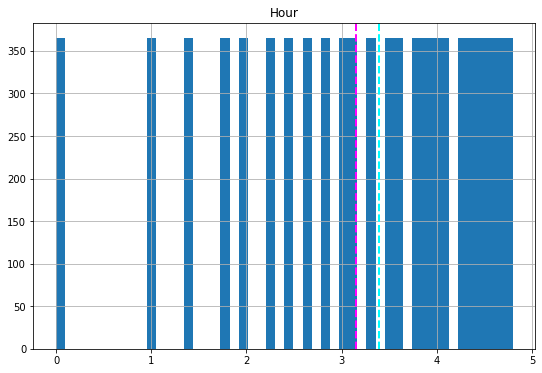

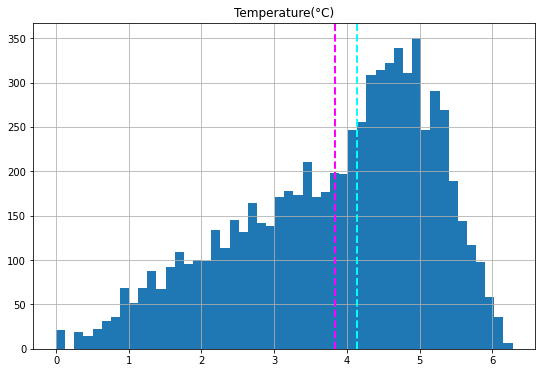

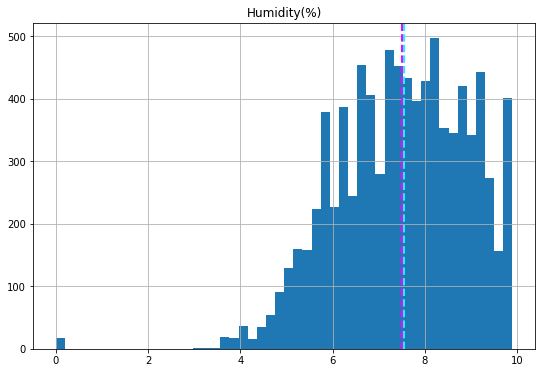

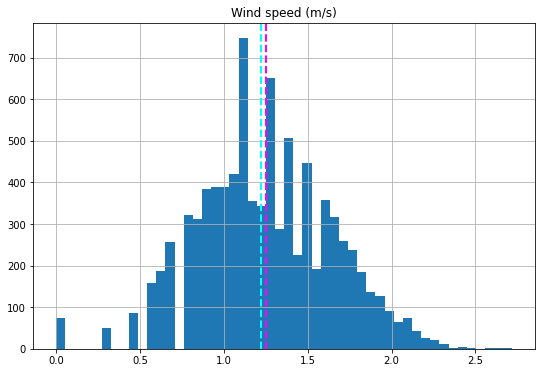

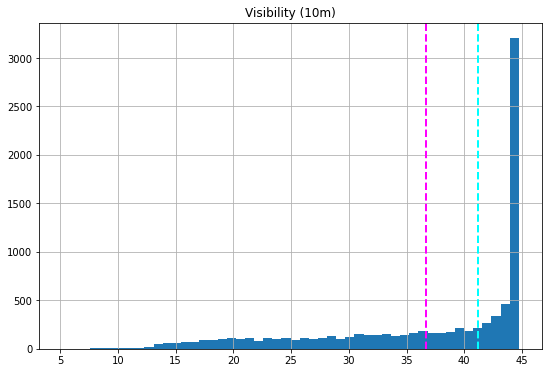

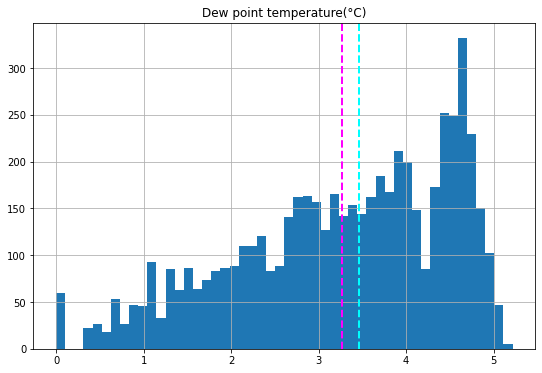

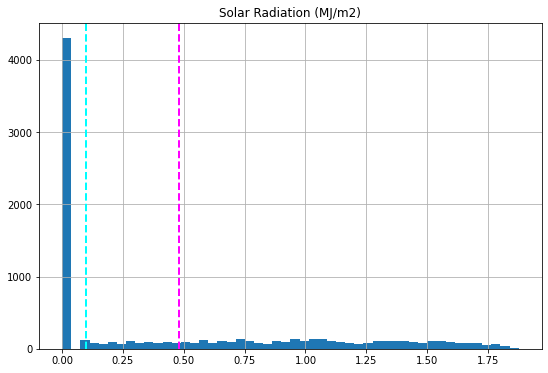

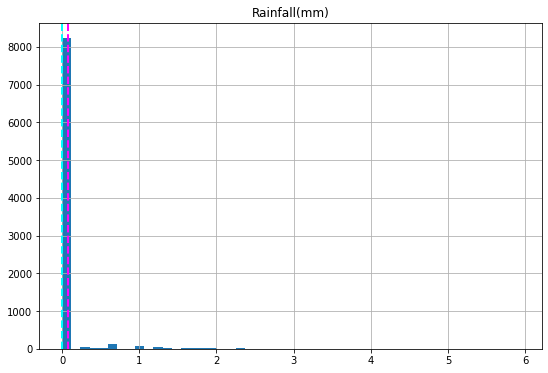

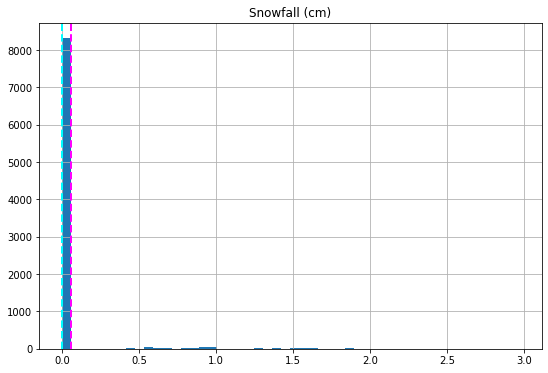

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()  #If the current axes doesn't exist, or isn't a polar one, the appropriate axes will be created and then returned.
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax) # 'ax stands for axis'
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
dataset.rename(columns={'Rented Bike Count': 'RentedBikeCount','Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility','Dew point temperature(°C)': 'DewPointTemperature', 'Solar Radiation (MJ/m2)':'SolarRadiation',
                   'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'FunctioningDay','Temperature(°C)':'Temperature','Humidity(%)':'Humidity'}, inplace=True)

In [ ]:
dataset.head(1)

Date  RentedBikeCount  Hour  ...  Seasons     Holiday  FunctioningDay
0  01/12/2017              254     0  ...   Winter  No Holiday             Yes

[1 rows x 14 columns]

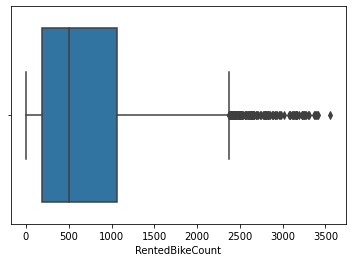

In [ ]:
sns.boxplot(dataset['RentedBikeCount'])

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

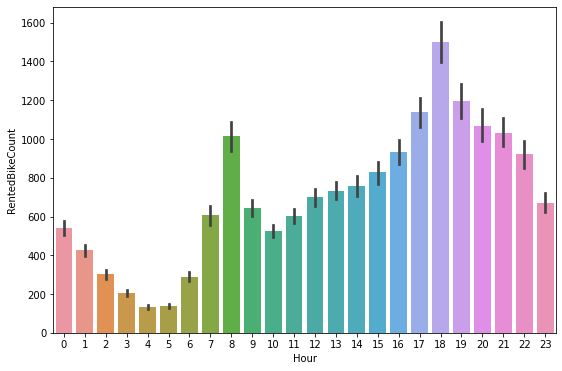

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(dataset['Hour'],dataset['RentedBikeCount'])

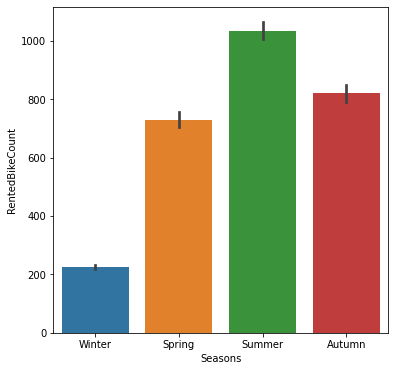

In [ ]:
plt.figure(figsize=(6,6))
season_plot=sns.barplot(dataset['Seasons'],dataset['RentedBikeCount'])

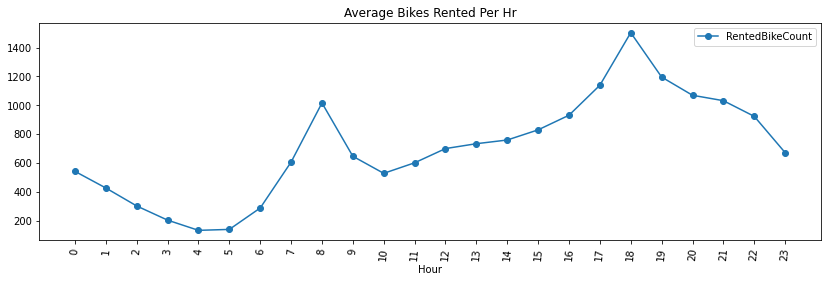

In [ ]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = dataset.groupby('Hour')['RentedBikeCount'].mean()
fig, (axis1) = plt.subplots(1,sharex=True,figsize=(14,4))
# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)
plt.show()

In [ ]:
#dataset['Date_month'] = dataset['Date'].apply(lambda x: (str(x)[3:]))
# group by Date(months) and get average Bikes rented
##fig, (axis1) = plt.subplots(1,sharex=True,figsize=(14,4))
# plot average rent over months
#avg_rent_months.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Month")
#ax1.set_xticks(range(len(avg_rent_months)))
#ax1.set_xticklabels(avg_rent_months.index.tolist(), rotation=85)
#plt.show()

**One Hot Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['Seasons'] = encoder.fit_transform(dataset['Seasons'])
dataset['Holiday'] = encoder.fit_transform(dataset['Holiday'])
dataset['FunctioningDay'] = encoder.fit_transform(dataset['FunctioningDay'])

In [ ]:
#dataset = pd.get_dummies(dataset, columns=['Seasons'], prefix=['Seasons'])

In [ ]:
dataset.head(1)

Date  RentedBikeCount  Hour  ...  Seasons  Holiday  FunctioningDay
0 2017-01-12              254     0  ...        3        1               1

[1 rows x 14 columns]

<Figure size 432x432 with 0 Axes>

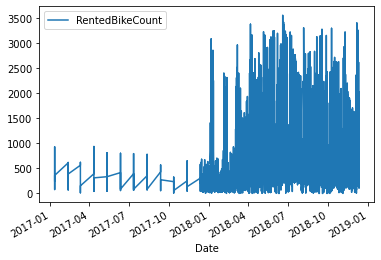

In [ ]:
plt.figure(figsize=(6,6))
dataset.plot(x='Date',y='RentedBikeCount',kind='line')

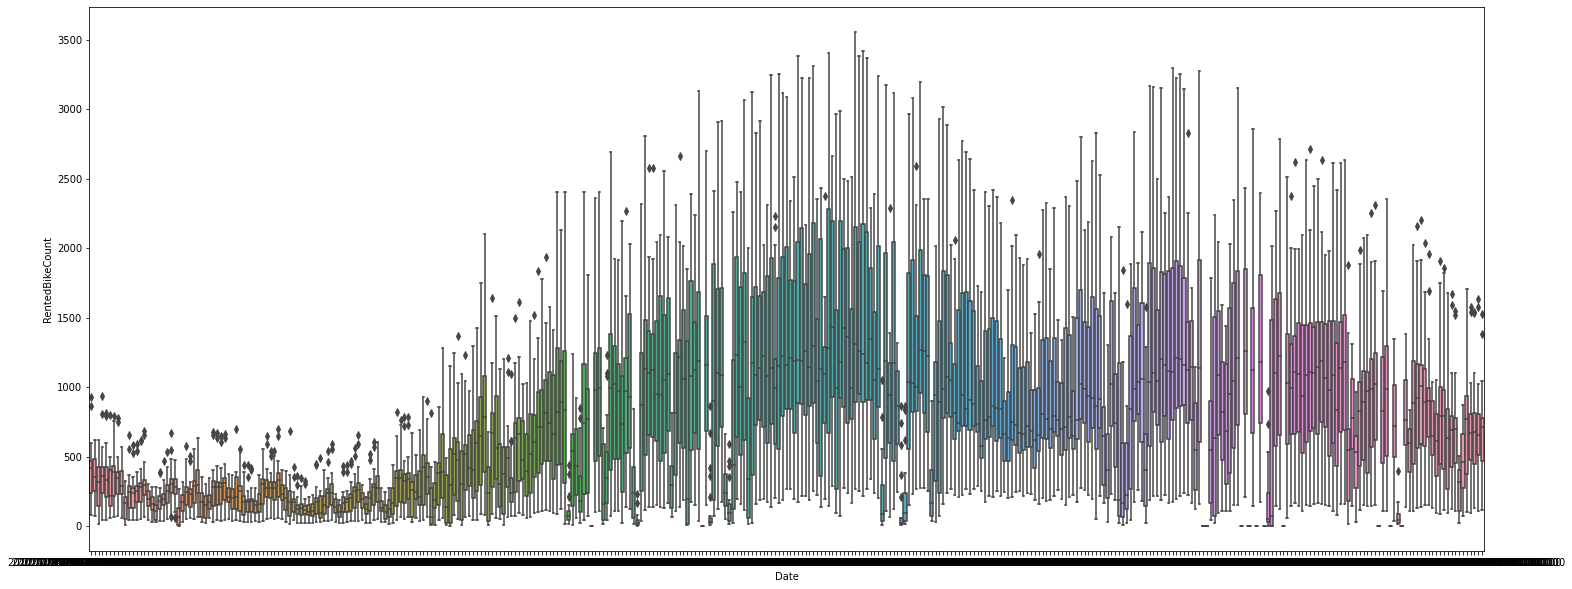

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x="Date", y="RentedBikeCount", data=dataset)
plt.show()

**Multicollinearity Check**

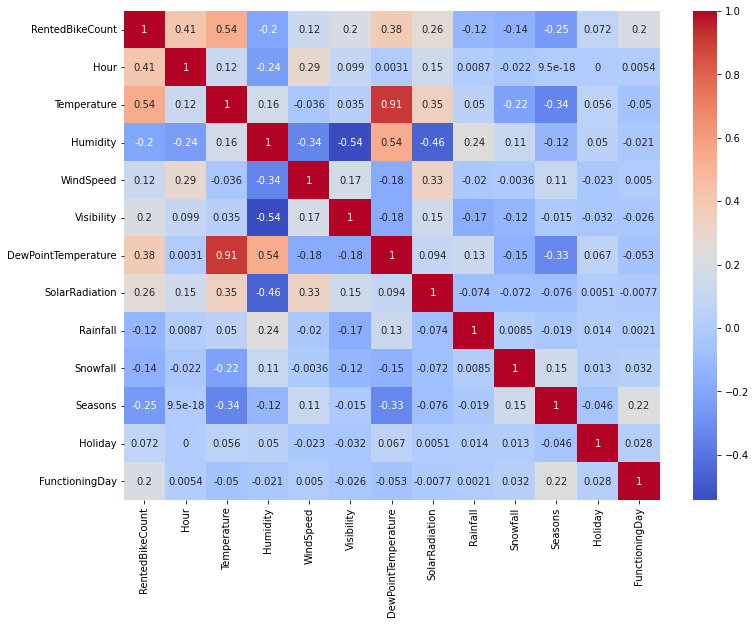

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8760 non-null   datetime64[ns]
 1   RentedBikeCount      8760 non-null   int64         
 2   Hour                 8760 non-null   int64         
 3   Temperature          8760 non-null   float64       
 4   Humidity             8760 non-null   int64         
 5   WindSpeed            8760 non-null   float64       
 6   Visibility           8760 non-null   int64         
 7   DewPointTemperature  8760 non-null   float64       
 8   SolarRadiation       8760 non-null   float64       
 9   Rainfall             8760 non-null   float64       
 10  Snowfall             8760 non-null   float64       
 11  Seasons              8760 non-null   int64         
 12  Holiday              8760 non-null   int64         
 13  FunctioningDay       8760 non-nul

In [ ]:
dataset['Date'] = dataset['Date'].values.astype(float)
dataset['Date']

0       1.484179e+18
1       1.484179e+18
2       1.484179e+18
3       1.484179e+18
4       1.484179e+18
            ...     
8755    1.543536e+18
8756    1.543536e+18
8757    1.543536e+18
8758    1.543536e+18
8759    1.543536e+18
Name: Date, Length: 8760, dtype: float64

In [ ]:
# Importing the VIF library 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = dataset.iloc[:,:-1]
calc_vif(X)

features         VIF
0                  Date  419.499732
1       RentedBikeCount    1.003616
2                  Hour    0.999868
3           Temperature    1.005364
4              Humidity    1.002410
5             WindSpeed    0.998074
6            Visibility    1.003109
7   DewPointTemperature    1.001465
8        SolarRadiation    1.000702
9              Rainfall    1.000007
10             Snowfall    0.999722
11              Seasons    0.990058
12              Holiday    1.005128

In [ ]:
# Removing date
dataset.drop(['Date'], axis = 1,inplace=True) 

In [ ]:
X = dataset.iloc[:,:-1]
calc_vif(X)

features        VIF
0       RentedBikeCount   4.236172
1                  Hour   5.061977
2           Temperature  43.778009
3              Humidity  15.263524
4             WindSpeed   4.848585
5            Visibility   9.140026
6   DewPointTemperature  23.144842
7        SolarRadiation   2.918672
8              Rainfall   1.105388
9              Snowfall   1.128549
10              Seasons   3.215753
11              Holiday  19.681768

In [ ]:
# Dropping temperature
dataset.drop(['Temperature'], axis = 1,inplace=True) 

In [ ]:
X = dataset.iloc[:,:-1]
calc_vif(X)

features        VIF
0       RentedBikeCount   3.984624
1                  Hour   4.866753
2              Humidity  13.077266
3             WindSpeed   4.805818
4            Visibility   6.373789
5   DewPointTemperature   2.514901
6        SolarRadiation   2.087096
7              Rainfall   1.105183
8              Snowfall   1.118263
9               Seasons   3.150477
10              Holiday  16.783325

In [ ]:
# Dropping Humidity
dataset.drop(['Humidity'], axis = 1,inplace=True) 

In [ ]:
X = dataset.iloc[:,:-1]
calc_vif(X)

features       VIF
0      RentedBikeCount  3.753108
1                 Hour  4.826967
2            WindSpeed  4.705428
3           Visibility  6.372967
4  DewPointTemperature  1.571181
5       SolarRadiation  1.731223
6             Rainfall  1.094009
7             Snowfall  1.087005
8              Seasons  3.015929
9              Holiday  8.186150

In [ ]:
dataset.head(1)

RentedBikeCount  Hour  WindSpeed  ...  Seasons  Holiday  FunctioningDay
0              254     0        2.2  ...        3        1               1

[1 rows x 11 columns]

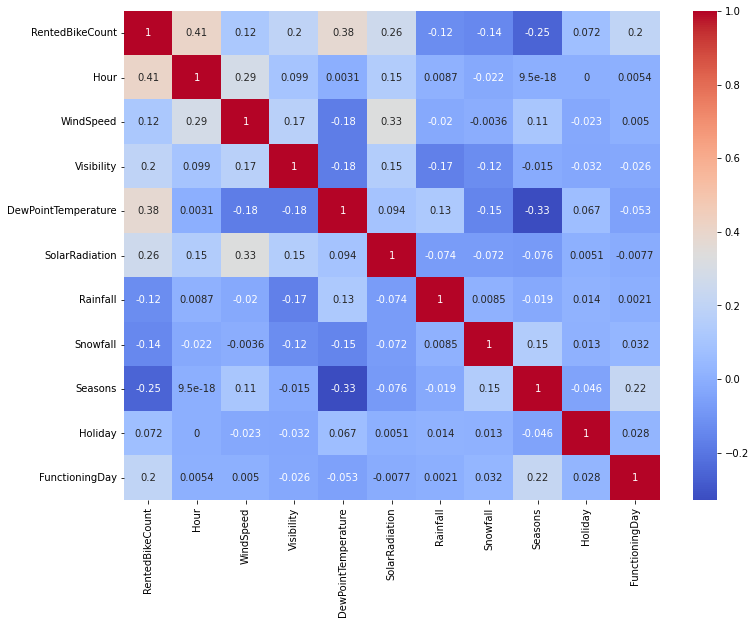

In [ ]:
# Coding from sharad
plt.figure(figsize=(12,9))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.show()

From the heatmap, 4 features are highely correlated with target variable

* Hour
* Temperature
* Dew point temperature
* Solar Radiation

**Dew point temperature and temperature are highely correlated with each other. we can remove Dew point temperature.**




# **Linear Regression**

In [ ]:
numeric_features = dataset.columns
numeric_features

Index(['RentedBikeCount', 'Hour', 'WindSpeed', 'Visibility',
       'DewPointTemperature', 'SolarRadiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'FunctioningDay'],
      dtype='object')

**Linearity Check**

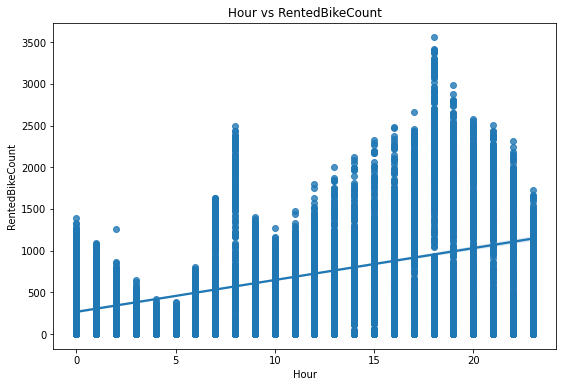

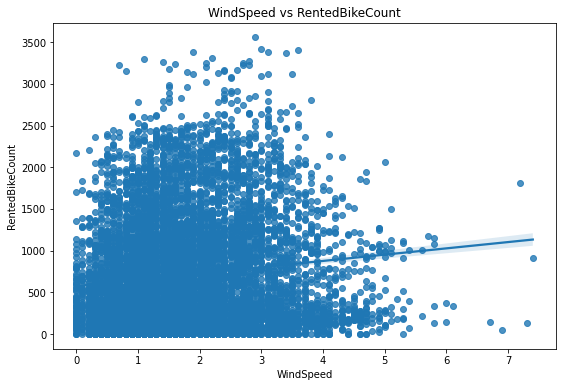

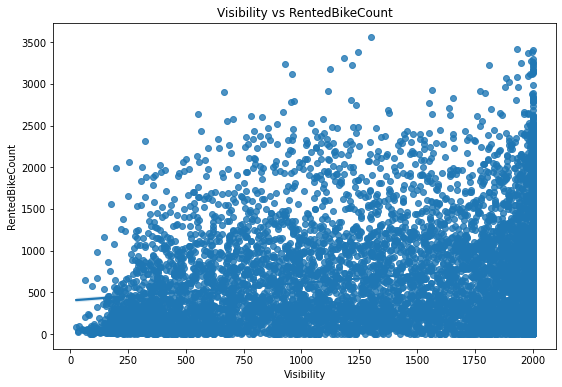

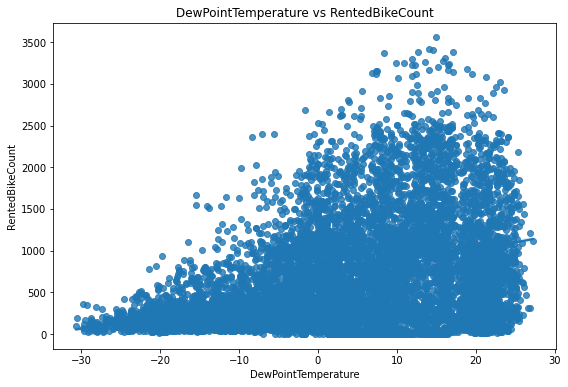

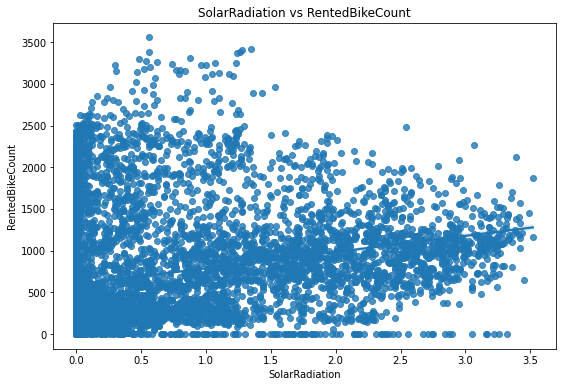

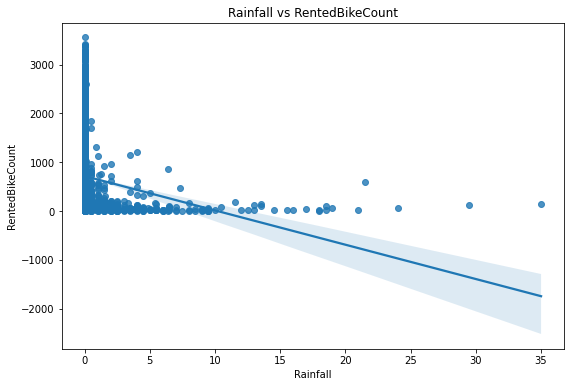

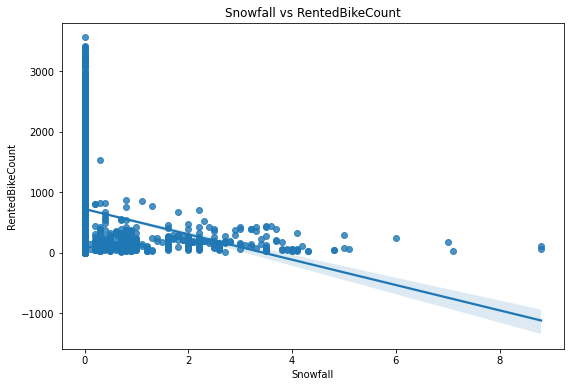

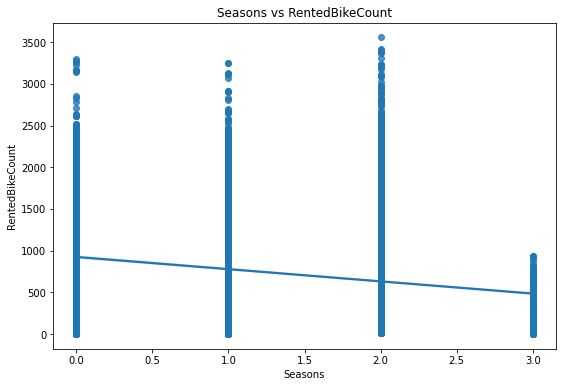

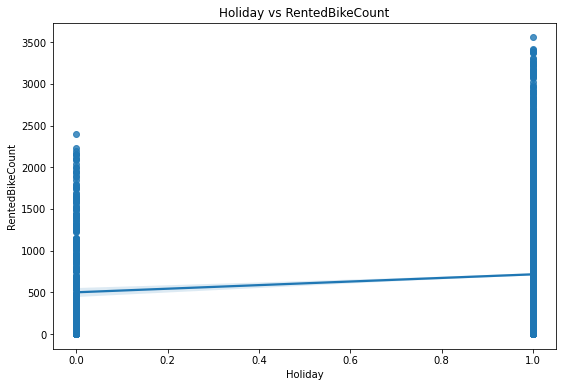

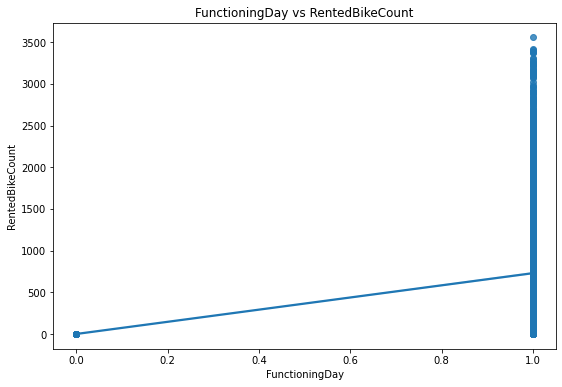

In [ ]:
for col in numeric_features[1:]:
  plt.figure(figsize=(9,6))
  sns.regplot(x=dataset[col], y=dataset['RentedBikeCount'])
  plt.title(col+' vs RentedBikeCount')
  plt.xlabel(col)
  plt.ylabel('RentedBikeCount')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = dataset[['Hour','WindSpeed','Visibility','DewPointTemperature','SolarRadiation','Rainfall','Snowfall','Seasons','Holiday','FunctioningDay']]
y = np.sqrt(dataset['RentedBikeCount'])

In [ ]:
# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X.shape)
print(y.shape)

(8760, 10)
(8760,)


In [ ]:
# Fitting Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([ 6.09742266e-01,  1.43521498e-01,  3.89449085e-03,  3.43943957e-01,
        2.26328875e+00, -1.85144385e+00, -1.35081134e+00, -2.13530496e+00,
        2.83622814e+00,  2.87442647e+01])

In [ ]:
regressor.intercept_

-18.928812714568473

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([22.38482531, 27.85708145, 20.09708399, ..., 21.07151444,
       36.09385313, 22.16929743])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
import math
math.sqrt(mean_squared_error(y_test, y_pred))

8.092305544700482

In [ ]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 65.48540902879017
RMSE : 8.092305544700482


In [ ]:
r2 = r2_score(y_test, y_pred)
print('R2 :',r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))  

R2 : 0.5841833427090142
Adjusted R2 :  0.5817949644362342


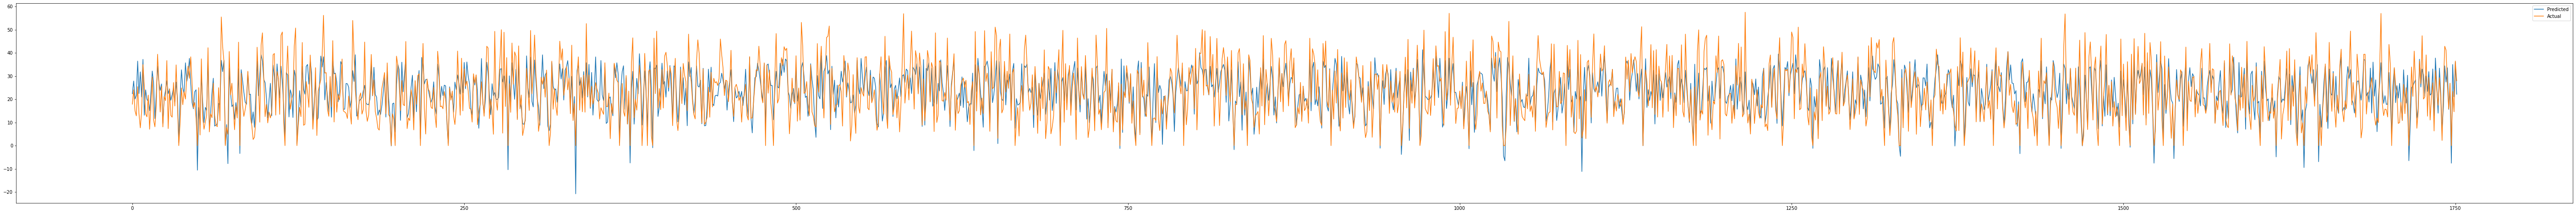

In [ ]:
plt.figure(figsize=(100,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

**Regularization**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.5882950904388804

In [ ]:
lasso.coef_

array([ 6.09746230e-01,  1.43429117e-01,  3.89456712e-03,  3.43950015e-01,
        2.26321743e+00, -1.85136651e+00, -1.35027192e+00, -2.13512619e+00,
        2.83424825e+00,  2.87408826e+01])

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014,0.001,0.005,0.01,0.05,0.1,0.5,1]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring= 'neg_mean_squared_error', cv= 5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014, 0.001, 0.005, 0.01,
                                   0.05, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [ ]:
print('The best fit alpha value is found out to be :' ,lasso_regressor.best_params_)
print('\nUsing', lasso_regressor.best_params_, ' the negative squared error is: ', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using {'alpha': 1e-15}  the negative squared error is:  -63.821578662559375


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

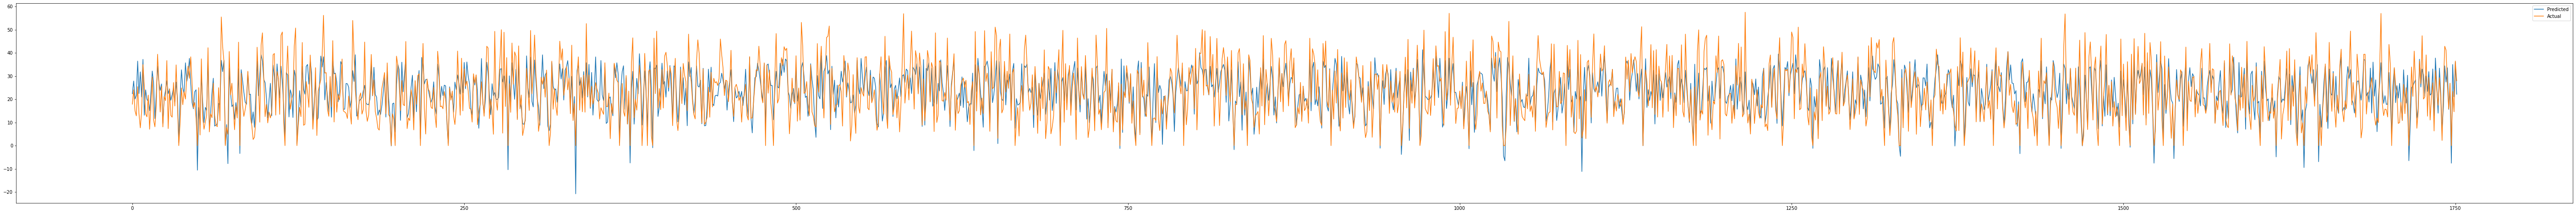

In [ ]:
plt.figure(figsize=(100,8))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show() 

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 65.48540902879027
RMSE : 8.092305544700489
R2 : 0.5841833427090135
Adjusted R2 :  0.5817949644362336


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.001,0.005,0.01,0.05,0.1,0.5,1]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                   1]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -63.75194558463676


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 65.48547991534107
RMSE : 8.092309924572902
R2 : 0.5841828925964001
Adjusted R2 :  0.5817945117382519


In [ ]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.5190983288807387

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.001,0.005,0.01,0.05,0.1,0.5,1],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15, 'l1_ratio': 0.5}

Using  {'alpha': 1e-15, 'l1_ratio': 0.5}  the negative mean squared error is:  -63.82157866255936


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 65.4854090287903
RMSE : 8.09230554470049
R2 : 0.5841833427090134
Adjusted R2 :  0.5817949644362335


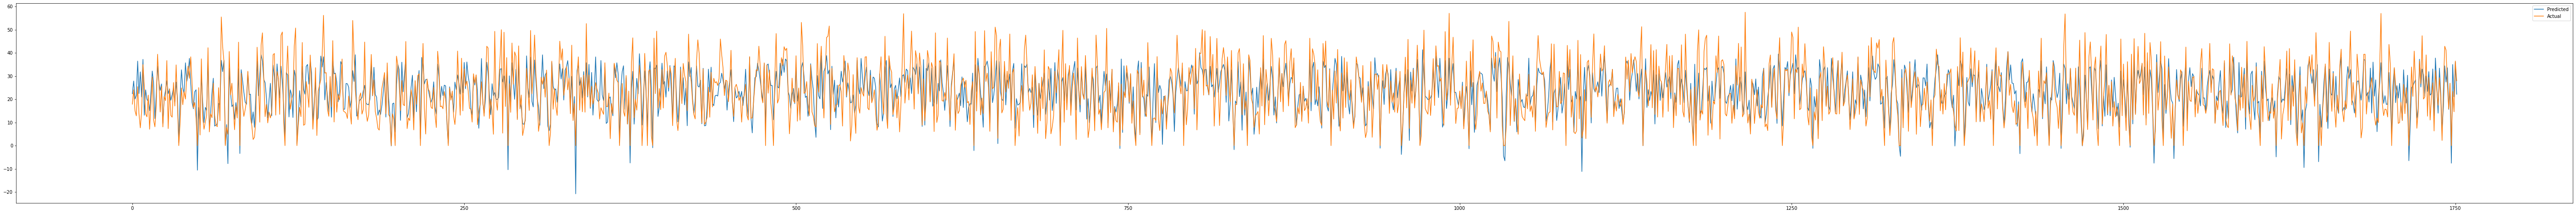

In [ ]:
plt.figure(figsize=(100, 8))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [ ]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 5.583964178323829
R2 score of training set is 0.797965236440101


The model performance for the test set
-------------------------------------------
RMSE of test set is 132.51148281739012
R2 score of test set is -110.49730391192028


In [ ]:
create_polynomial_regression_model(5)

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.732863655249624
R2 score of training set is 0.85485942360252


The model performance for the test set
-------------------------------------------
RMSE of test set is 69.8618109526239
R2 score of test set is -29.9911018082118


#Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [ ]:
# train decision tree model
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=6,criterion='mse')

In [ ]:
# model fiting
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6)

In [ ]:
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of trained data :',dtr_score)

Accuracy of trained data : 0.7505156364065305


In [ ]:
dtr1_score=dtr.score(X_test,y_test)
print('Accuracy of test data :',dtr1_score)

Accuracy of test data : 0.7420385618538752


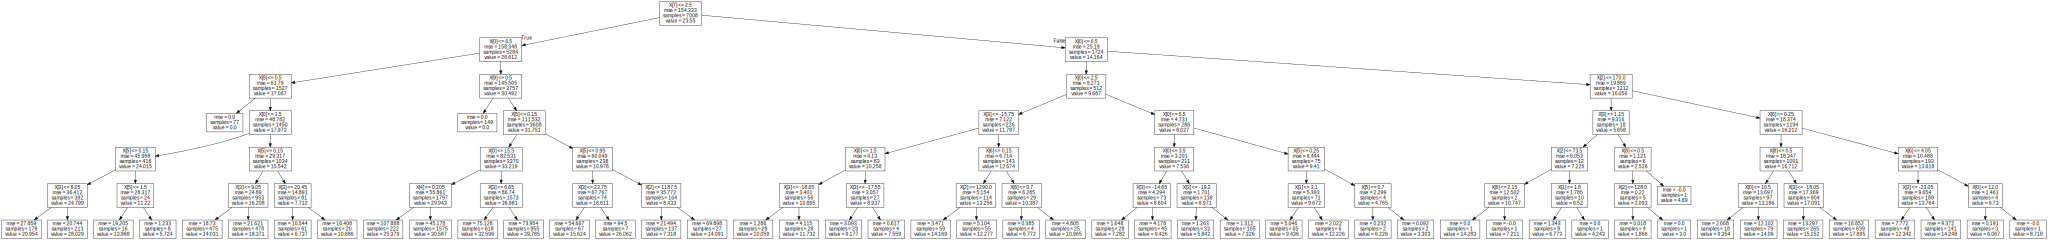

In [ ]:
#Plot the learned model
from sklearn import tree
import pydot
import graphviz

# export the learned model to tree
dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
#predict the model
dtr_pred=dtr.predict(X_test)
dtr_pred

array([14.03065773, 18.37107108, 14.24820068, ..., 20.95436004,
       32.59643086, 20.95436004])

In [ ]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 6.373804310593634
Mean absolute error : 4.519232983040323


In [ ]:
#R-squared scores
r2_scores_test = cross_val_score(dtr, X_test, y_test, cv=9)
print('R-squared scores :',np.average(r2_scores_test))

R-squared scores : 0.7387818923635862


In [ ]:
parameters = {'max_depth' : [1,3,4,5,6,7,8,9,10,15,20], 'max_leaf_nodes':[5,10,15,20,25,30,40,45]}

dt_reg=DecisionTreeRegressor()

gridSearch_dt=GridSearchCV(dt_reg,parameters,scoring='r2',cv=6)
gridSearch_dt.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 40, 45]},
             scoring='r2')

In [ ]:
gridSearch_dt.best_params_

{'max_depth': 15, 'max_leaf_nodes': 45}

In [ ]:
gridSearch_dt.best_score_

0.7912118775780473

In [ ]:
gridSearch_dt.best_score_

0.7912118775780473

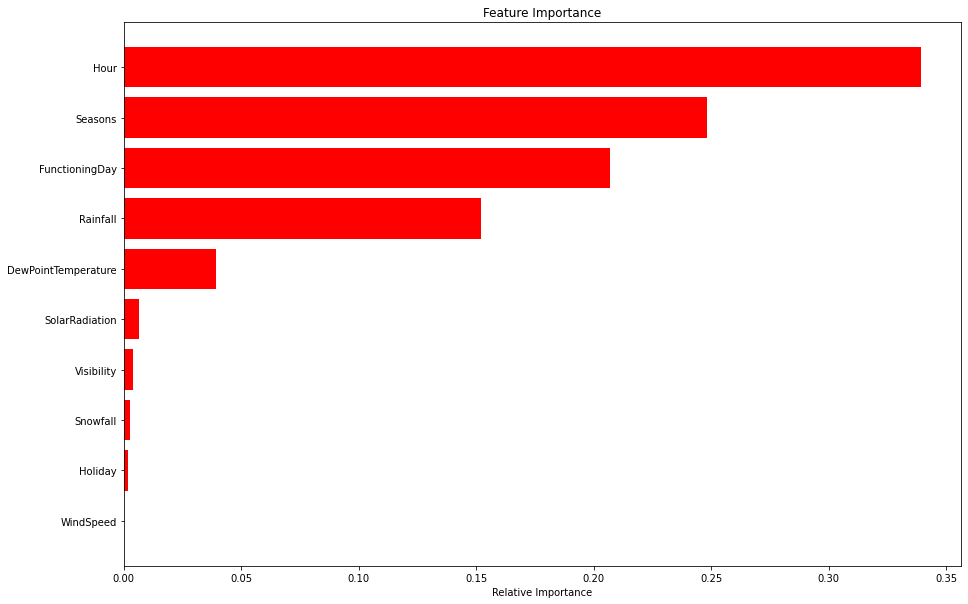

In [ ]:
get_features_importance(dtr,X_train)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf,param_grid=params,verbose=0)

In [ ]:
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'max_leaf_nodes': [40, 60, 80],
                         'n_estimators': [60, 80, 100]})

In [ ]:
rf_grid.best_params_

{'max_depth': 15, 'max_leaf_nodes': 80, 'n_estimators': 80}

In [ ]:
rf_grid.best_score_

0.8393468974945121

In [ ]:
optimal_model = rf_grid.best_estimator_

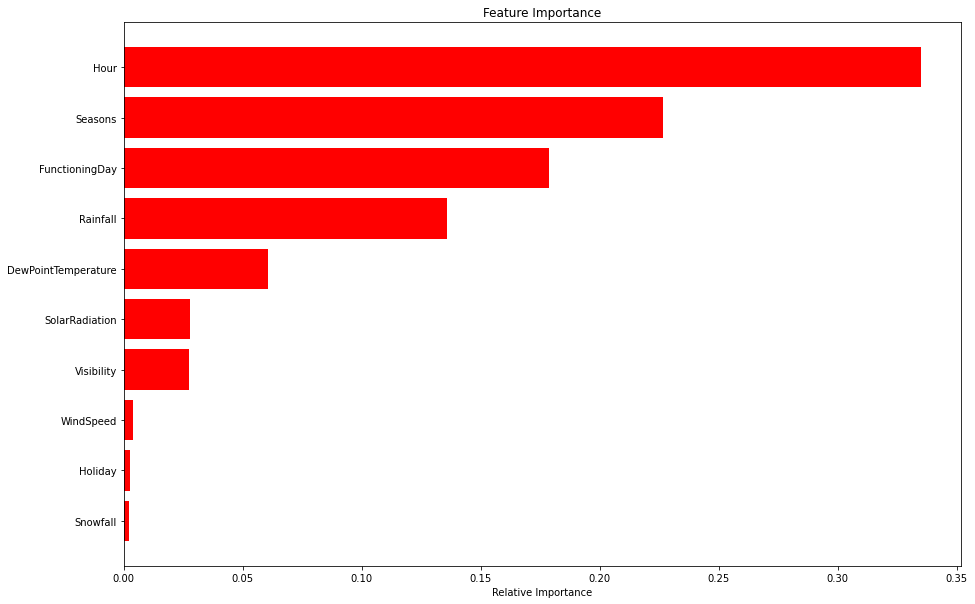

In [ ]:
get_features_importance(optimal_model,X_train)

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
gb = GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb,param_grid=params,verbose=0)

In [ ]:
gb_grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]})

In [ ]:
gb_grid.best_params_

{'max_depth': 15, 'n_estimators': 80}

In [ ]:
gb_grid.best_score_

0.824708371868575

In [ ]:
optimal_model1 = gb_grid.best_estimator_

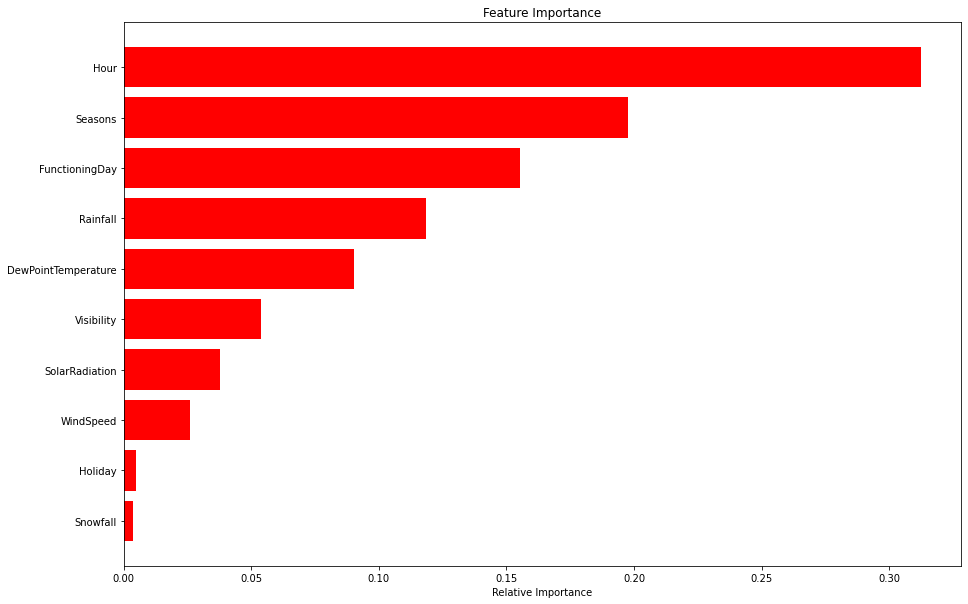

In [ ]:
get_features_importance(optimal_model1,X_train)

# XG Boost

In [ ]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
#creating Xgboost model
xgb=XGBRegressor()

In [ ]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb,param_grid=params,verbose=0)

In [ ]:
xgb_grid.fit(X_train, y_train)

[14:13:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(estimator=XGBRegressor(),
             param_grid={'max_depth': [15, 20, 30],
                         'n_estimators': [80, 100, 150]})

In [ ]:
xgb_grid.best_params_

{'max_depth': 15, 'n_estimators': 80}

In [ ]:
xgb_grid.best_score_

0.8528114426810287

In [ ]:
optimal_model2 = xgb_grid.best_estimator_

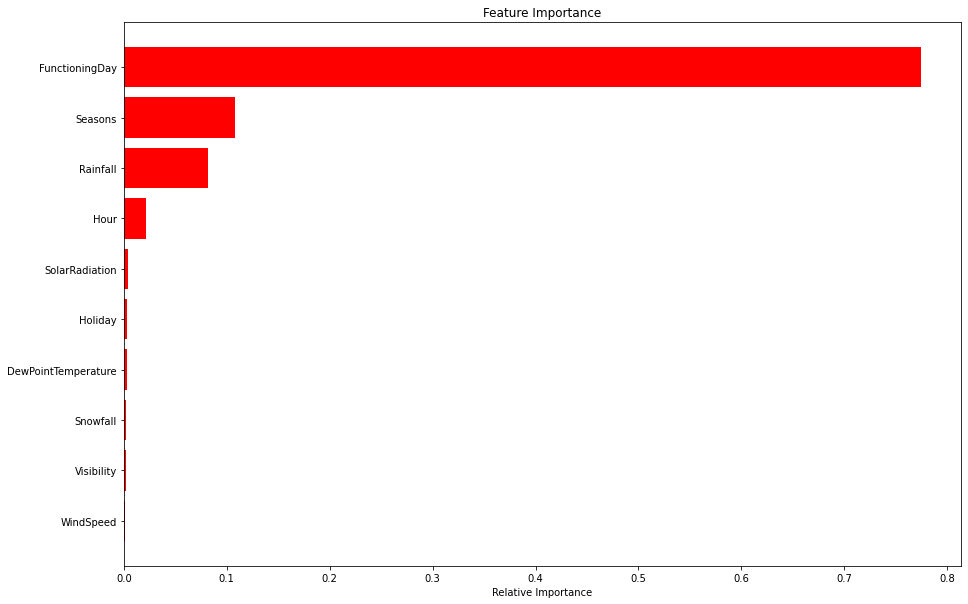

In [ ]:
get_features_importance(optimal_model2,X_train)